In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | yellowknife
Processing Record 2 of Set 13 | paracuru
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | tuktoyaktuk
Processing Record 5 of Set 13 | clyde river
Processing Record 6 of Set 13 | saint-philippe
Processing Record 7 of Set 13 | novopokrovka
Processing Record 8 of Set 13 | tabiauea
Processing Record 9 of Set 13 | matamoros
Processing Record 10 of Set 13 | vila franca do campo
Processing Record 11 of Set 13 | prince rupert
Processing Record 12 of Set 13 | cabo san lucas
Processing Record 13 of Set 13 | liuli
Processing Record 14 of Set 13 | bluff
Processing Record 15 of Set 13 | okhotsk
Processing Record 16 of Set 13 | dickinson
Processing Record 17 of Set 13 | hermanus
Processing Record 18 of Set 13 | monastyrshchina
Processing Record 19 of Set 13 | east london
Processing Record 20 of Set 13 | hobart
Processing Record 21 of Set 13 | kahului
Processing Record 22 of Set 13 | rikitea
Processing Record 23 of Set 13 | mount gamb

In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 19 of Set 25 | yellowknife
Processing Record 20 of Set 25 | paracuru
Processing Record 21 of Set 25 | ushuaia
Processing Record 22 of Set 25 | tuktoyaktuk
Processing Record 23 of Set 25 | clyde river
Processing Record 24 of Set 25 | saint-philippe
Processing Record 25 of Set 25 | novopokrovka
Processing Record 26 of Set 25 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 25 | matamoros
Processing Record 28 of Set 25 | vila franca do campo
Processing Record 29 of Set 25 | prince rupert
Processing Record 30 of Set 25 | cabo san lucas
Processing Record 31 of Set 25 | liuli
Processing Record 32 of Set 25 | bluff
Processing Record 33 of Set 25 | okhotsk
Processing Record 34 of Set 25 | dickinson
Processing Record 35 of Set 25 | hermanus
Processing Record 36 of Set 25 | monastyrshchina
Processing Record 37 of Set 25 | east london
Processing Record 38 of Set 25 | hobart
Processing Record 39 of Set 25 | kahului
Processing Record 40 of Set 25 | rikitea
Proces

Processing Record 38 of Set 28 | gushikawa
Processing Record 39 of Set 28 | ngunguru
Processing Record 40 of Set 28 | talnakh
Processing Record 41 of Set 28 | illoqqortoormiut
City not found. Skipping...
Processing Record 42 of Set 28 | berlevag
Processing Record 43 of Set 28 | khuzhir
Processing Record 44 of Set 28 | lupiro
Processing Record 45 of Set 28 | machali
Processing Record 46 of Set 28 | sioux lookout
Processing Record 47 of Set 28 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 28 | porto walter
Processing Record 49 of Set 28 | rockport
Processing Record 50 of Set 28 | sorland
Processing Record 1 of Set 29 | soyo
Processing Record 2 of Set 29 | blagoyevo
Processing Record 3 of Set 29 | norman wells
Processing Record 4 of Set 29 | saint george
Processing Record 5 of Set 29 | elat
Processing Record 6 of Set 29 | paragominas
Processing Record 7 of Set 29 | dicabisagan
Processing Record 8 of Set 29 | yumen
Processing Record 9 of Set 29 | marcona
City not fo

Processing Record 21 of Set 32 | bako
Processing Record 22 of Set 32 | bathsheba
Processing Record 23 of Set 32 | saint-pierre
Processing Record 24 of Set 32 | bereznik
Processing Record 25 of Set 32 | tieli
Processing Record 26 of Set 32 | honiara
Processing Record 27 of Set 32 | malpe
Processing Record 28 of Set 32 | adiake
Processing Record 29 of Set 32 | panjab
Processing Record 30 of Set 32 | kruisfontein
Processing Record 31 of Set 32 | sakaiminato
Processing Record 32 of Set 32 | korla
Processing Record 33 of Set 32 | teya
Processing Record 34 of Set 32 | amapa
Processing Record 35 of Set 32 | coihaique
Processing Record 36 of Set 32 | castlemaine
Processing Record 37 of Set 32 | liberal
Processing Record 38 of Set 32 | pangody
Processing Record 39 of Set 32 | komatsu
Processing Record 40 of Set 32 | minas
Processing Record 41 of Set 32 | kapoeta
Processing Record 42 of Set 32 | willmar
Processing Record 43 of Set 32 | thunder bay
Processing Record 44 of Set 32 | labelle
Process

Processing Record 7 of Set 36 | la ronge
Processing Record 8 of Set 36 | bure
Processing Record 9 of Set 36 | sao bento do sul
Processing Record 10 of Set 36 | erenhot
Processing Record 11 of Set 36 | cockburn town
Processing Record 12 of Set 36 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 36 | mareeba
Processing Record 14 of Set 36 | shenjiamen
Processing Record 15 of Set 36 | quatre cocos
Processing Record 16 of Set 36 | karamea
City not found. Skipping...
Processing Record 17 of Set 36 | ulaangom
Processing Record 18 of Set 36 | phan rang
City not found. Skipping...
Processing Record 19 of Set 36 | belaya gora
Processing Record 20 of Set 36 | bitung
Processing Record 21 of Set 36 | mount pleasant
Processing Record 22 of Set 36 | tomatlan
Processing Record 23 of Set 36 | magdagachi
Processing Record 24 of Set 36 | vanavara
Processing Record 25 of Set 36 | kysyl-syr
Processing Record 26 of Set 36 | manuk mangkaw
Processing Record 27 of Set 36 | holmestrand
Process

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.46,-114.35,55.4,93,90,6.93,CA,2020-08-18 11:15:54
1,Paracuru,-3.41,-39.03,79.0,61,56,14.00,BR,2020-08-18 11:20:13
2,Ushuaia,-54.80,-68.30,27.5,94,62,6.42,AR,2020-08-18 11:19:21
3,Tuktoyaktuk,69.45,-133.04,46.6,89,94,12.33,CA,2020-08-18 11:20:13
4,Clyde River,70.47,-68.59,53.6,76,1,6.93,CA,2020-08-18 11:20:13
5,Saint-Philippe,-21.36,55.77,77.0,65,50,25.28,RE,2020-08-18 11:20:14
6,Novopokrovka,49.84,36.55,86.0,27,68,8.95,UA,2020-08-18 11:20:14
7,Matamoros,25.53,-103.25,77.0,53,20,6.91,MX,2020-08-18 11:20:14
8,Vila Franca Do Campo,37.72,-25.43,75.2,88,40,14.99,PT,2020-08-18 11:20:14
9,Prince Rupert,54.32,-130.32,57.2,100,90,4.70,CA,2020-08-18 11:17:19


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2020-08-18 11:15:54,62.46,-114.35,55.4,93,90,6.93
1,Paracuru,BR,2020-08-18 11:20:13,-3.41,-39.03,79.0,61,56,14.00
2,Ushuaia,AR,2020-08-18 11:19:21,-54.80,-68.30,27.5,94,62,6.42
3,Tuktoyaktuk,CA,2020-08-18 11:20:13,69.45,-133.04,46.6,89,94,12.33
4,Clyde River,CA,2020-08-18 11:20:13,70.47,-68.59,53.6,76,1,6.93
5,Saint-Philippe,RE,2020-08-18 11:20:14,-21.36,55.77,77.0,65,50,25.28
6,Novopokrovka,UA,2020-08-18 11:20:14,49.84,36.55,86.0,27,68,8.95
7,Matamoros,MX,2020-08-18 11:20:14,25.53,-103.25,77.0,53,20,6.91
8,Vila Franca Do Campo,PT,2020-08-18 11:20:14,37.72,-25.43,75.2,88,40,14.99
9,Prince Rupert,CA,2020-08-18 11:17:19,54.32,-130.32,57.2,100,90,4.70


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.-6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
import time

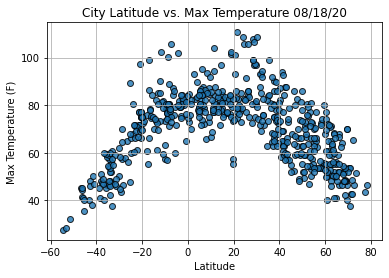

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

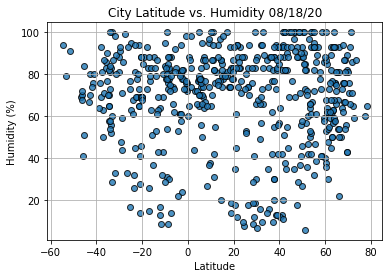

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

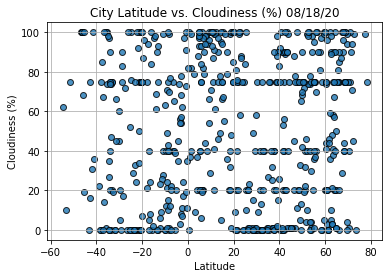

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

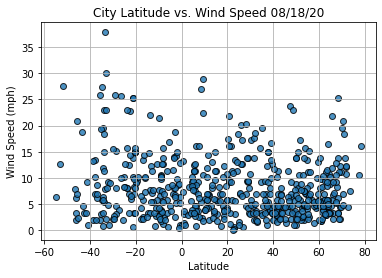

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()